In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90,high=90,size=1500)
lngs = np.random.uniform(low=-90,high=90,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [15]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

618

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ae6d99df2a193d8c3f4c5cb1809ce300


In [18]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margate
Processing Record 2 of Set 1 | bruck an der mur
Processing Record 3 of Set 1 | fort-shevchenko
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | oliveira dos brejinhos
Processing Record 7 of Set 1 | grand gaube
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | kaniama
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | umm lajj
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | roald
Processing Record 20 of Set 1 | rincon
Processing Record 21 of Set 1 

Processing Record 37 of Set 4 | mirnyy
Processing Record 38 of Set 4 | malwan
City not found. Skipping...
Processing Record 39 of Set 4 | laguna
Processing Record 40 of Set 4 | sinop
Processing Record 41 of Set 4 | randolph
Processing Record 42 of Set 4 | rio brilhante
Processing Record 43 of Set 4 | wageningen
Processing Record 44 of Set 4 | barawe
City not found. Skipping...
Processing Record 45 of Set 4 | ostrovnoy
Processing Record 46 of Set 4 | laguna de perlas
Processing Record 47 of Set 4 | lieksa
Processing Record 48 of Set 4 | plouzane
Processing Record 49 of Set 4 | dakar
Processing Record 50 of Set 4 | pafos
Processing Record 1 of Set 5 | norrtalje
Processing Record 2 of Set 5 | redcliffe
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | cervo
Processing Record 5 of Set 5 | coihaique
Processing Record 6 of Set 5 | wajir
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | hobyo
Processing Record 9 of Set 5 

City not found. Skipping...
Processing Record 29 of Set 8 | maragogi
Processing Record 30 of Set 8 | jacareacanga
Processing Record 31 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 32 of Set 8 | takoradi
Processing Record 33 of Set 8 | baramati
Processing Record 34 of Set 8 | amalapuram
Processing Record 35 of Set 8 | zanjan
Processing Record 36 of Set 8 | odienne
Processing Record 37 of Set 8 | saint-louis
Processing Record 38 of Set 8 | pilibanga
Processing Record 39 of Set 8 | feijo
Processing Record 40 of Set 8 | palmares do sul
Processing Record 41 of Set 8 | puerto baquerizo moreno
Processing Record 42 of Set 8 | rio gallegos
Processing Record 43 of Set 8 | kabo
Processing Record 44 of Set 8 | hamilton
Processing Record 45 of Set 8 | colon
Processing Record 46 of Set 8 | cajamarca
Processing Record 47 of Set 8 | nouadhibou
Processing Record 48 of Set 8 | morondava
Processing Record 49 of Set 8 | new glasgow
Processing Record 50 of Set 8 | tenenkou

Processing Record 17 of Set 12 | moroni
Processing Record 18 of Set 12 | lemesos
City not found. Skipping...
Processing Record 19 of Set 12 | hunza
City not found. Skipping...
Processing Record 20 of Set 12 | cartagena del chaira
Processing Record 21 of Set 12 | asfi
Processing Record 22 of Set 12 | jahrom
City not found. Skipping...
Processing Record 23 of Set 12 | sipoo
Processing Record 24 of Set 12 | vaslui
Processing Record 25 of Set 12 | mehamn
Processing Record 26 of Set 12 | nyagan
Processing Record 27 of Set 12 | lock haven
Processing Record 28 of Set 12 | beloha
Processing Record 29 of Set 12 | barroualie
City not found. Skipping...
Processing Record 30 of Set 12 | santa rosa
Processing Record 31 of Set 12 | benguela
Processing Record 32 of Set 12 | chicama
Processing Record 33 of Set 12 | qaqortoq
Processing Record 34 of Set 12 | shu
Processing Record 35 of Set 12 | sorland
Processing Record 36 of Set 12 | kingston
Processing Record 37 of Set 12 | paradwip
City not found. Sk

In [20]:
len(city_data)

570

In [21]:
# Convert the arrat of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Margate,51.3813,1.3862,67.10,75,48,4.00,GB,2022-07-21 17:58:06
1,Bruck An Der Mur,47.4036,15.2952,81.75,77,79,5.77,AT,2022-07-21 17:58:06
2,Fort-Shevchenko,44.5086,50.2630,77.36,68,79,21.99,KZ,2022-07-21 17:58:06
3,Narsaq,60.9167,-46.0500,55.80,72,9,7.54,GL,2022-07-21 17:58:07
4,Oliveira Dos Brejinhos,-12.3169,-42.8961,87.58,21,7,5.46,BR,2022-07-21 17:58:08
5,Grand Gaube,-20.0064,57.6608,70.20,73,62,8.99,MU,2022-07-21 17:58:08
6,Victoria,22.2855,114.1577,86.18,77,0,1.01,HK,2022-07-21 17:58:08
7,Bredasdorp,-34.5322,20.0403,48.74,86,42,1.79,ZA,2022-07-21 17:56:33
8,Kaniama,-7.5667,24.1833,77.20,39,62,4.43,CD,2022-07-21 17:58:09
9,Vila Velha,-20.3297,-40.2925,80.55,79,40,11.50,BR,2022-07-21 17:58:10


In [22]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Margate,GB,2022-07-21 17:58:06,51.3813,1.3862,67.10,75,48,4.00
1,Bruck An Der Mur,AT,2022-07-21 17:58:06,47.4036,15.2952,81.75,77,79,5.77
2,Fort-Shevchenko,KZ,2022-07-21 17:58:06,44.5086,50.2630,77.36,68,79,21.99
3,Narsaq,GL,2022-07-21 17:58:07,60.9167,-46.0500,55.80,72,9,7.54
4,Oliveira Dos Brejinhos,BR,2022-07-21 17:58:08,-12.3169,-42.8961,87.58,21,7,5.46
5,Grand Gaube,MU,2022-07-21 17:58:08,-20.0064,57.6608,70.20,73,62,8.99
6,Victoria,HK,2022-07-21 17:58:08,22.2855,114.1577,86.18,77,0,1.01
7,Bredasdorp,ZA,2022-07-21 17:56:33,-34.5322,20.0403,48.74,86,42,1.79
8,Kaniama,CD,2022-07-21 17:58:09,-7.5667,24.1833,77.20,39,62,4.43
9,Vila Velha,BR,2022-07-21 17:58:10,-20.3297,-40.2925,80.55,79,40,11.50


In [23]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Get Data For Plotting
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

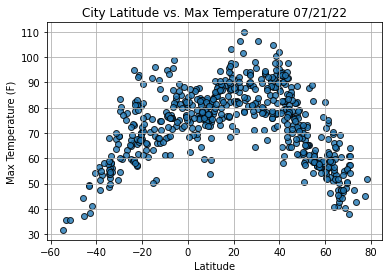

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

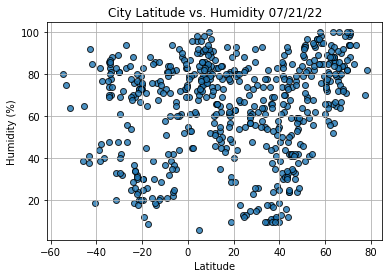

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plt.
plt.show()

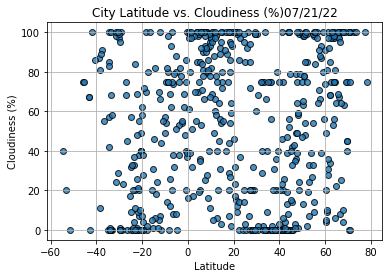

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

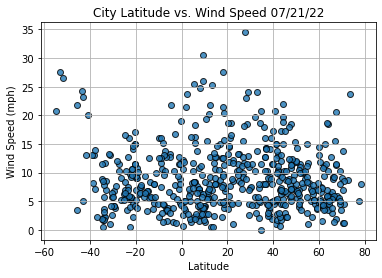

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()